# Linear Regression을 사용한 E-commerce 고객별 연간 지출액 예측

 - https://www.kaggle.com/code/aryan348/ecommerce-customers-linear-regression/
 - github 자료 사용
     - https://github.com/araj2/customer-database/blob/master/Ecommerce%20Customers.csv
 

# 1. 모듈 및 데이터 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ecom_df = pd.read_csv('https://raw.githubusercontent.com/araj2/customer-database/master/Ecommerce%20Customers.csv')
ecom_df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


#### XLS

엑셀 파일은 openpyxl 설치 필요

In [2]:
! pip install openpyxl

In [1]:
# ecom_df = pd.read_excel('data/Ecommerce Customers.xls')
# ecom_df.head()

## 데이터 칼럼 설명
- Email: 고객 이메일
- Address: 고객 주소
- Avatar: 아바타
- Avg. Session Length: 한 번 접속 시 머문 평균 시간
- Time on App: 앱에서 쓴 시간
- Time on Website: 웹사이트에서 쓴 시간
- Length of Membership: 고객의 멤버십 가입 기간
- Yearly Amount Spent: 고객의 연간 지출액(종속변수)

In [6]:
ecom_df.tail()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510
499,hannahwilson@davidson.com,49791 Rachel Heights Apt. 898\nEast Drewboroug...,DarkMagenta,33.715981,12.418808,35.771016,2.735160,497.778642


# 2. 데이터 특성 확인

In [3]:
ecom_df.info()     # 데이터 정보. 인덱스와 칼럼의 데이터 개수/ 종류 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [8]:
ecom_df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


- 데이터 결측치 없음

In [5]:
ecom_df.isna().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [6]:
ecom_df.describe()     # 데이터 통계 정보. 수치형 데이터(int, float)가 들어있는 칼럼의 기초통계량 확인

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


- 75%, max를 비교하면 아웃라이어 존재 확인 가능

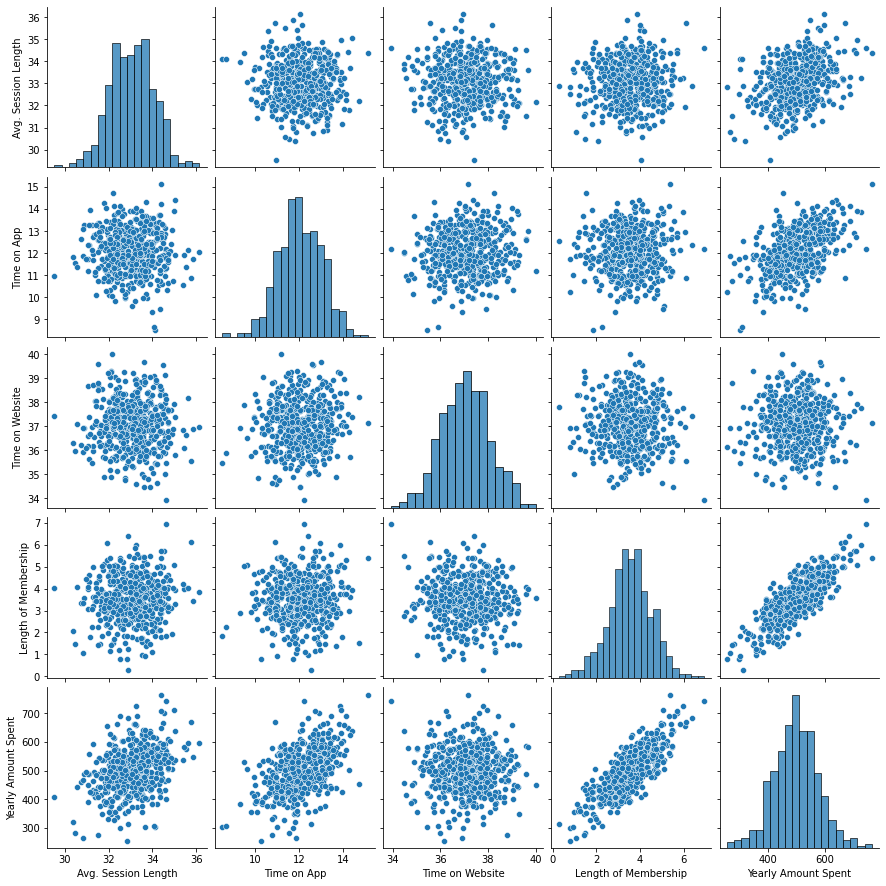

In [7]:
sns.pairplot(ecom_df)     # 변수간 관계 확인

# 3. 불필요한 칼럼 제거

'Email', 'Address', 'Avatar' 컬럼 제외

In [9]:
# ecom_df = ecom_df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']]
ecom_df = ecom_df.drop(['Email', 'Address', 'Avatar'], axis = 1)
ecom_df.head()     # 필요한 칼럼만 가져와서 data에 저장


KeyError: "['Email', 'Address', 'Avatar'] not found in axis"

In [12]:
ecom_df.loc[:, ['Time on App']]

,Time on App
0,12.655651
1,11.109461
2,11.330278
3,13.717514
4,12.795189
...,...
495,13.566160
496,11.695736
497,11.499409
498,12.391423


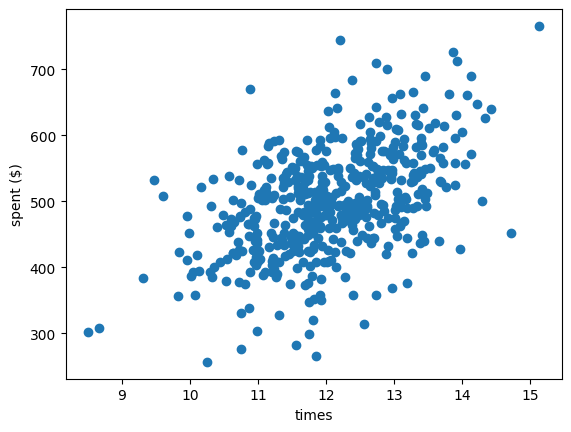

In [11]:
# 변수와 target과의 관계를 시각화
import matplotlib.pyplot as plt
X_time = ecom_df.loc[:, ['Time on App']] # Time on App
y = ecom_df['Yearly Amount Spent']

# 산점도 그리기
plt.scatter(X_time, y)
plt.xlabel("times")
plt.ylabel("spent ($)")
plt.show()

In [14]:
X_time.shape, y.shape

((500, 1), (500,))

In [12]:
# 상관계수를 확인
ecom_df.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


<AxesSubplot:>

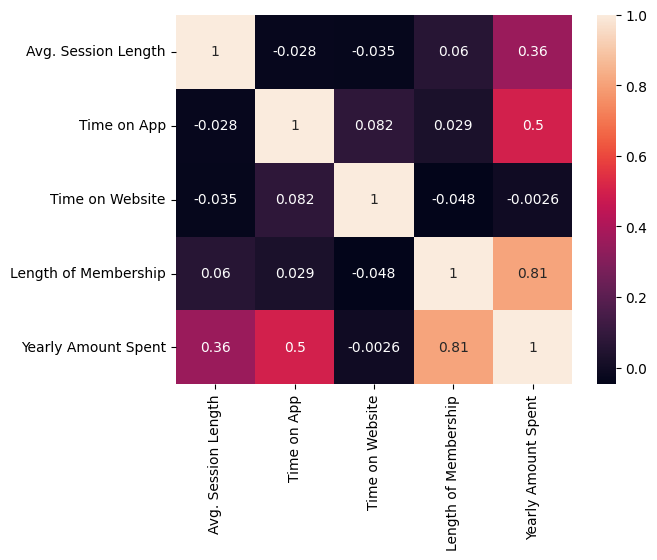

In [14]:
sns.heatmap(ecom_df.corr(), annot=True)

In [15]:
from sklearn.linear_model import LinearRegression

lg_clf = LinearRegression()
lg_clf.fit(X_time, y)

LinearRegression()

In [16]:
print("모델의 가중치:", lg_clf.coef_)
print("모델의 절편:", lg_clf.intercept_)

모델의 가중치: [39.8344913]
모델의 절편: 19.209312412886675


In [19]:
y

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620145
498    456.469510
499    497.778642
Name: Yearly Amount Spent, Length: 500, dtype: float64

In [18]:

pred_space = np.linspace(
    min(X_time.values), max(X_time.values)
).reshape(-1, 1)

lg_clf.predict(pred_space)

/Users/qkboo/.venv/Fintech_Lecture/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([358.12722623, 363.50800599, 368.88878576, 374.26956552,
       379.65034529, 385.03112506, 390.41190482, 395.79268459,
       401.17346436, 406.55424412, 411.93502389, 417.31580365,
       422.69658342, 428.07736319, 433.45814295, 438.83892272,
       444.21970248, 449.60048225, 454.98126202, 460.36204178,
       465.74282155, 471.12360132, 476.50438108, 481.88516085,
       487.26594061, 492.64672038, 498.02750015, 503.40827991,
       508.78905968, 514.16983944, 519.55061921, 524.93139898,
       530.31217874, 535.69295851, 541.07373827, 546.45451804,
       551.83529781, 557.21607757, 562.59685734, 567.97763711,
       573.35841687, 578.73919664, 584.1199764 , 589.50075617,
       594.88153594, 600.2623157 , 605.64309547, 611.02387523,
       616.404655  , 621.78543477])

/Users/qkboo/.venv/Fintech_Lecture/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


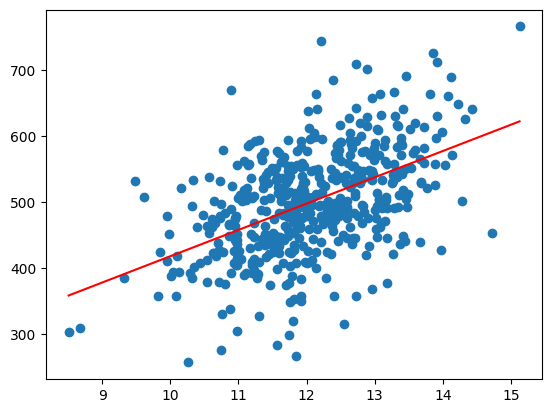

In [20]:
# 실제 학습 데이터와 회귀선
import numpy as np

pred_space = np.linspace(
    min(X_time.values), max(X_time.values)
).reshape(-1, 1)

# 산점도를 그려 봅니다.
plt.scatter(X_time, y)
# 회귀선 
plt.plot(pred_space, # X축
         lg_clf.predict(pred_space),  # y
         color="red"
        ) # 우리 모델의 예측값
plt.show()

# 4. train / test 나누기

In [21]:
from sklearn.model_selection import train_test_split     # train set/ test set 나누기

X = ecom_df.drop('Yearly Amount Spent', axis = 1)     # 독립변수
# X = data[['Avg.Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
X

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


In [23]:
y = ecom_df['Yearly Amount Spent']     # 종속변수
y

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620145
498    456.469510
499    497.778642
Name: Yearly Amount Spent, Length: 500, dtype: float64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 100)     # train set을 80%, test set을 20%로

- 보통 train:test 비율을 7:3으로 함(데이터가 10000이상으로 충분히 클 때)
- 데이터 크기가 작으면 8:2
- random_state는 분석의 편의를 위해 매번 똑같은 결과를 얻기 위해 작성.

In [ ]:
X_train

# 5. Linear Regression 모델

In [24]:
from sklearn.linear_model import LinearRegression

reg_all = LinearRegression()
model = reg_all.fit(X_train, y_train)

In [25]:
# 가중치와 절편
print("가중치:", model.coef_)
print("절편:", model.intercept_)

가중치: [25.9448301  38.68834344  0.33680834 61.61334338]
절편: -1054.9451459509478


In [58]:
# 모델 검증
print("훈련 세트 점수: {:.2f}".format(reg_all.score(X_train, y_train))) # 학습 데이터 
print("테스트 세트 점수: {:.2f}".format(reg_all.score(X_test, y_test))) # 테스트 데이터

훈련 세트 점수: 0.99
테스트 세트 점수: 0.98


# 6. 예측 및 평가

In [ ]:
# 보스턴 데이터 셋의 첫번째 데이터와 타겟
print("데이터 셋 관측치:", X_test.iloc[1])
print("데이터 셋 label:", y_test.iloc[1])

In [28]:
X_test.iloc[1].shape

(4,)

In [27]:
test = X_test.iloc[1]
test

Avg. Session Length     33.105438
Time on App             11.965020
Time on Website         37.277812
Length of Membership     4.742578
Name: 29, dtype: float64

In [ ]:
X_train.shape

In [29]:
# 모델이 예측한 예측치
reg_all.predict(test.values.reshape(1, -1))

/Users/qkboo/.venv/Fintech_Lecture/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([571.63815527])

In [30]:
# 모델의 실제 값.
y_test.iloc[1]

554.7220838330761

### 모든 테스트 세트 예측

In [31]:
predictions = model.predict(X_test)     # 예측 데이터
predictions

array([445.12819226, 571.63815527, 543.26621622, 435.35348225,
       516.59343796, 472.69073078, 397.68749119, 570.57413253,
       461.32153736, 542.7116676 , 463.8731882 , 442.96611074,
       451.98079949, 486.35532862, 643.2264987 , 500.43895095,
       490.71847075, 468.03812976, 492.09135446, 336.77871914,
       426.87590817, 506.81204517, 623.15518077, 667.04642907,
       387.20584164, 559.01516883, 495.07242698, 435.13980971,
       511.28042648, 459.58954206, 379.91070537, 462.66154375,
       479.58048206, 425.71787716, 570.42725328, 646.02025304,
       627.91200916, 523.18112541, 486.58749812, 516.60987419,
       553.96094386, 481.05135838, 505.23132554, 566.90482094,
       471.74211731, 590.23378503, 404.4176239 , 490.45858484,
       531.30144132, 451.59812684, 563.17385477, 496.57348682,
       682.45835428, 530.78244661, 531.50893144, 491.5210762 ,
       313.49505458, 501.99108936, 421.77584416, 577.88163636,
       456.04631949, 523.46056076, 504.98001624, 511.67

In [60]:
y_test.values     # 실제 데이터

array([451.57568516, 554.72208383, 541.04983096, 442.72289157,
       522.40414126, 478.88539132, 392.28524425, 577.27345498,
       448.93329321, 541.22658399, 465.88931271, 442.66725174,
       463.92351299, 510.5394217 , 662.96108781, 508.73574095,
       473.94985742, 475.26342373, 468.91350132, 327.37795259,
       426.77521599, 511.03878605, 614.71533383, 640.18774001,
       392.49739919, 571.47103412, 492.10505239, 408.21690177,
       493.18021625, 447.68790654, 373.8857237 , 447.18764431,
       478.18305971, 418.6027421 , 581.85234404, 640.5840619 ,
       630.15672817, 501.74923331, 490.73863214, 521.57217476,
       576.31117737, 479.24741678, 510.15981728, 570.63009809,
       465.17662331, 584.21831349, 397.4205841 , 502.13278923,
       529.19451886, 443.19722103, 553.99467359, 502.0925279 ,
       669.9871405 , 529.04900413, 532.75178758, 501.20917268,
       304.13559158, 507.39006179, 436.58074035, 581.79879768,
       461.92087689, 533.04006018, 506.54730705, 524.63

In [33]:
from sklearn.metrics import mean_squared_error


In [34]:
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MSE: 121.12878113887663
RMSE: 11.005852131428835


In [65]:
y_train.shape, y_test.shape

((400,), (100,))

In [35]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print(f'결정계수: {r2}')

결정계수: 0.9762085988255775
